# **Customer Churn Prediction**

**DQLab Telco** merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan. Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (**churn**) dengan menggunakan machine learning.

Pada Part 1 ini akan dilakukan **data wrangling (data cleansing)** sebelum dilakukan pemodelan agar model prediksi menjadi lebih akurat dengan kualitas data yang lebih terjamin.

## **Dataset**

Dataset yang digunakan berasal dari (https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv). Asumsikan dataset ini merupakan data yang terakhir diperbarui oleh DQLab Telco pada bulan Juni 2020.

Untuk detail datanya adalah sebagai berikut:

* UpdatedAt : Periode of Data taken
* customerID : Customer ID
* gender : Whether the customer is a male or a female (Male, Female)
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn : Whether the customer churned or not (Yes or No)



## **Import Library**

Library yang digunakan dalam pembahasan ini meliputi:
- **pandas** untuk analisis dan manipulasi data
- **matplotlib** untuk visualisasi data

In [1]:
# Load library 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 50

## **Data Cleansing**

Langkah yang akan dilakukan antara lain,
1. Mencari ID pelanggan (nomor telepon) yang valid.
2. Mengatasi data-data yang masih kosong atau *missing values*.
3. Mengatasi nilai-nilai pencilan (outlier) pada variabel numerik.
4. Menstandarisasi nilai dari variabel kategorik.

In [2]:
# Load dataset
df_load = pd.read_csv('data/data_dqlab_telco.csv')

# Print first five rows
df_load.head(5)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Print number of rows and number of columns
print(f'Dataset ini memiliki {df_load.shape[0]} baris dan {df_load.shape[1]} kolom')

# Print number of unique Customer ID
print('Jumlah ID Pelanggan yang unik adalah',df_load.customerID.nunique())

Dataset ini memiliki 7113 baris dan 22 kolom
Jumlah ID Pelanggan yang unik adalah 7017


In [4]:
# View info data
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


### **Mencari Validitas ID Pelanggan**

**Memfilter ID Pelanggan dengan Format Tertentu**

Format ID Pelanggan (Phone Number) yang benar, yaitu:

* Panjang karakter adalah 11-12.
* Terdiri dari angka saja, tidak diperbolehkan ada karakter selain angka.
* Diawali dengan angka 45 pada 2 digit pertama.



In [5]:
# Create new column to check validity Customer ID
df_load['valid_id'] = df_load['customerID'].astype('str').str.match(r'(45\d{9,10})')

# Get rows of valid data
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)

# Total valid Customer ID with filtering
print('Hasil jumlah ID Pelanggan yang terfilter adalah', df_load['customerID'].count())

Hasil jumlah ID Pelanggan yang terfilter adalah 7006


**Memfilter Duplikasi ID pelanggan**

Memastikan bahwa tidak ada ID pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

* Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya.
* Duplikasi dikarenakan inserting beda periode pengambilan data.



In [6]:
# Drop duplicate rows
df_load.drop_duplicates()

# Drop duplicate rows Customer ID by periods
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

# Total valid Customer ID without duplicated
print('Hasil jumlah ID Pelanggan yang sudah dihilangkan duplikasinya adalah',df_load['customerID'].count())

Hasil jumlah ID Pelanggan yang sudah dihilangkan duplikasinya adalah 6993


**Validitas dari ID Pelanggan** sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersbut, terdapat perbedaan jumlah ID Pelanggan dari data pertama kali di load sampai dengan hasil validitas. Dimana jumlah baris data ketika pertama kali di load ada sebanyak 7113 baris, lalu setelah di cek validitas dari ID pelanggan, maka terfilter 6993 baris data.

### **Mengecek dan Menangani Missing Values**


Karena tujuan project ini adalah memprediksi **churn** maka data pada kolom `Churn` tidak boleh kosong. Jika ditemukan missing values maka akan dilakukan penghapusan data.

In [7]:
# Missing values kolom Churn
print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())

# Dropping all Rows with spesific column
df_load.dropna(subset=['Churn'], inplace=True)
print('Total data setelah penghapusan missing values adalah', df_load.shape[0])

Total missing values data dari kolom Churn 43
Total data setelah penghapusan missing values adalah 6950


**Mengatasi Missing Values dengan Pengisian Nilai tertentu**

Selain dengan menghapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Pada project ini diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

  *  Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk Lama berlangganan di isi dengan 11.
  *  Variable yang bersifat numerik selain Tenure di isi dengan median dari masing-masing variable tersebut.




In [8]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

# Handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median_data = df_load[col_name].median()
    df_load[col_name].fillna(median_data, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV

Setelah kita analisis lebih lanjut, ternyata masih ada *missing values* dari data yang kita sudah cek validitas ID Pelanggannya. Missing values terdapat pada kolom **Churn, tenure, MonthlyCharges, dan TotalCharges**. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)

### **Mendeteksi dan Mengatasi Outlier**

**Mendeteksi Outlier**

Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa menggunakan **Box Plot**. **Box Plot** merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. Outlier biasanya ditemukan pada variabel bertipe numerik.



Persebaran data sebelum ditangani Outlier: 
       UpdatedAt  SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count     6950.0    6950.000000  6950.000000     6950.000000   6950.000000
mean    202006.0       0.162302    32.477266       65.783741   2305.083460
std          0.0       0.368754    25.188910       50.457871   2578.651143
min     202006.0       0.000000     0.000000        0.000000     19.000000
25%     202006.0       0.000000     9.000000       36.462500    406.975000
50%     202006.0       0.000000    29.000000       70.450000   1400.850000
75%     202006.0       0.000000    55.000000       89.850000   3799.837500
max     202006.0       1.000000   500.000000     2311.000000  80000.000000


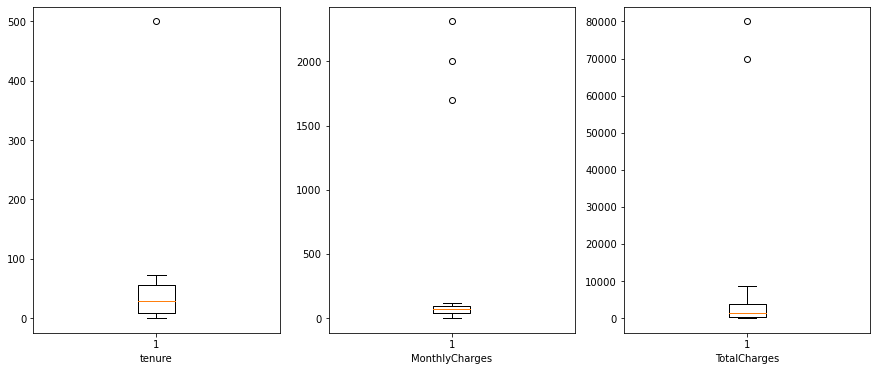

In [9]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load.describe())

# Creating Box Plot
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 6)
ax[0].boxplot(df_load['tenure'])
ax[0].set_xlabel('tenure')
ax[1].boxplot(df_load['MonthlyCharges'])
ax[1].set_xlabel('MonthlyCharges')
ax[2].boxplot(df_load['TotalCharges'])
ax[2].set_xlabel('TotalCharges')
plt.show()

Dari ketiga boxplot dengan variable **tenure, MonthlyCharges, dan TotalCharges** terlihat jelas terdapat adanya outlier. Hal ini bisa di identifikasi dari adanya titik titik yang berada jauh dari gambar boxplotnya. Jika kita lihat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali. Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai Maximum & Minimum dari interquartile range (IQR).

**Mengatasi Outlier**

Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi outlier dengan menggunakan **metode interquartile range (IQR)**. 

Tentukan:

  -  Nilai Minimum dan Maximum data di tolerir
  -  Ubah Nilai yg di luar range Minumum & Maximum ke dalam nilai Minimum dan Maximum


In [10]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


Setelah di tangani outliernya, dan dilihat persebaran datanya, terlihat sudah tidak ada lagi nilai yang outlier.

### **Standarisasi Nilai dari Variabel Kategorikal**

**Mengecek Nilai Tidak Standard**

Selanjutnya kita akan mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standarisasi dari data yang sudah terinput.


In [11]:
# Check standardization
for col_name in df_load.select_dtypes(include='object').columns:
    print('Unique Values Count Before Standardized Variable',col_name)
    print(df_load[col_name].value_counts())
    print('\n')

Unique Values Count Before Standardized Variable customerID
45386549500    1
45577435073    1
45612256114    1
45896795719    1
45513613179    1
              ..
45996422740    1
45740109343    1
45954614082    1
45795432264    1
45077845221    1
Name: customerID, Length: 6950, dtype: int64


Unique Values Count Before Standardized Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64


Unique Values Count Before Standardized Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64


Unique Values Count Before Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64


Unique Values Count Before Standardized Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64


Unique Values Count Before Standardized Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64


Unique Values 

Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah :

  -  **gender** (Female, Male, Wanita, Laki-Laki), yang bisa di standarkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
  - **Dependents** (Yes, No, Iya), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
  -  **Churn** (Yes, No, Churn), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.

**Menstandarisasi Variable Kategorik**

Setelah kita mengetahui variable mana saja yang ada nilai tidak standar, maka kita standarkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes

In [12]:
# Change values
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Check values after standardization
for col_name in list(['gender','Dependents','Churn']):
    print('Unique Values Count After Standardized Variable',col_name)
    print(df_load[col_name].value_counts())
    print('\n')

Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64


Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64


Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64




Terlihat bahwa nilai dari variabel sudah standar dan siap dianggap sudah bersih atau *clean*.

**Save Clean Dataset**

Setelah raw data dilakukan data cleansing, selanjutnya data ini dapat digunakan untuk pemodelan.

In [13]:
# Print first five rows clean data
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,202006,45315483266,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,202006,45236961615,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,202006,45929827382,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,202006,45305082233,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


In [14]:
# Save clean data
df_load.reset_index(drop=True, inplace=True)
df_load.to_csv('data/data_cleansing_telco.csv', index=False)